# Find Wally Tutorial

In this exercise we are going to play the "Find wally" game. 

- **Inputs**: 
    You have 2 images, one with the Wally's profile, and another with the puzzle, were we should find Wally.

- **Expected result**:
    Visual location of Wally in the provided puzzle. 

## Requirements
You'll need the following libraries: 
- `ipykernel`
- `matplotlib`
- `opencv-python`
- `opencv-contrib-python`
- `nb_black`
- `ipympl`
- `scipy`
- `scikit-image`

## Guides
In the previous class, we introduced Local Features. 
This exercise is a great example of the one application of the local features, especially doe to its mental complexity. 

An option to implement this mini project is to: 
1. Find keypoints in both provided images
2. Build their descriptors
3. Match the descriptors between the 2 images
4. Run outlier removal algorithms to remove the incorrect matches.


In [2]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2
%matplotlib inline

## 1. Read the input images

Steps: 
1. Read the two images
2. Convert them to RGB
3. Have a version of them in GrayScale

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img_wallys_face = cv2.imread("wally.png")
img_find_wally = cv2.imread("find_wally.jpeg")

In [4]:
# --- YOUR CODE HERE, TO PREPARE THE IMAGE ---
img_wallys_face_gray = cv2.cvtColor(img_wallys_face, cv2.COLOR_BGR2GRAY)
img_find_wally_gray = cv2.cvtColor(img_find_wally, cv2.COLOR_BGR2GRAY)

Display the images:

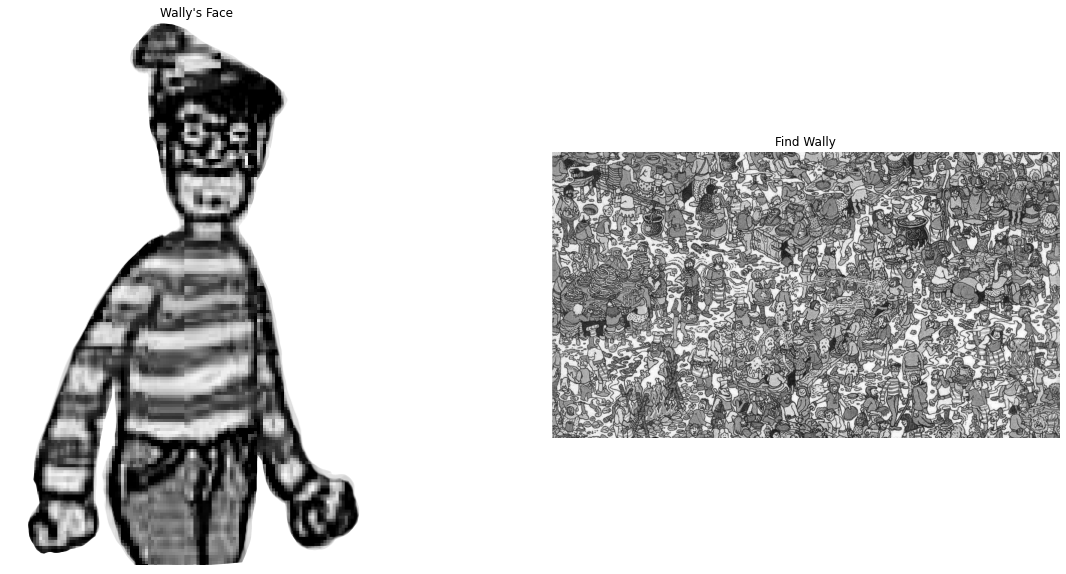

In [5]:
fx, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].set_title("Wally's Face")
ax[0].imshow(img_wallys_face_gray, cmap="gray")
ax[0].axis("off")

ax[1].set_title("Find Wally")
ax[1].imshow(img_find_wally_gray, cmap="gray")
ax[1].axis("off")
plt.show()

# Detect keypoints and create descriptor

During the class we mentioned SIFT, however you can use any algorithm for detection and description.

Steps: 
1. Find keypoints from the 2 grayscale images
2. Store their descriptors 

In [6]:
# --- YOUR CODE HERE, TO PREPARE DETECT THE KEYPOINTS, AND RESPECTIVE DESCRIPTORS ---
# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints
kp_find_wally, des_find_wally = sift.detectAndCompute(img_find_wally_gray, None)
kp_wally_face, des_wally_face = sift.detectAndCompute(img_wallys_face_gray, None)

Draw keypoints in pattern's image - Wally's image.

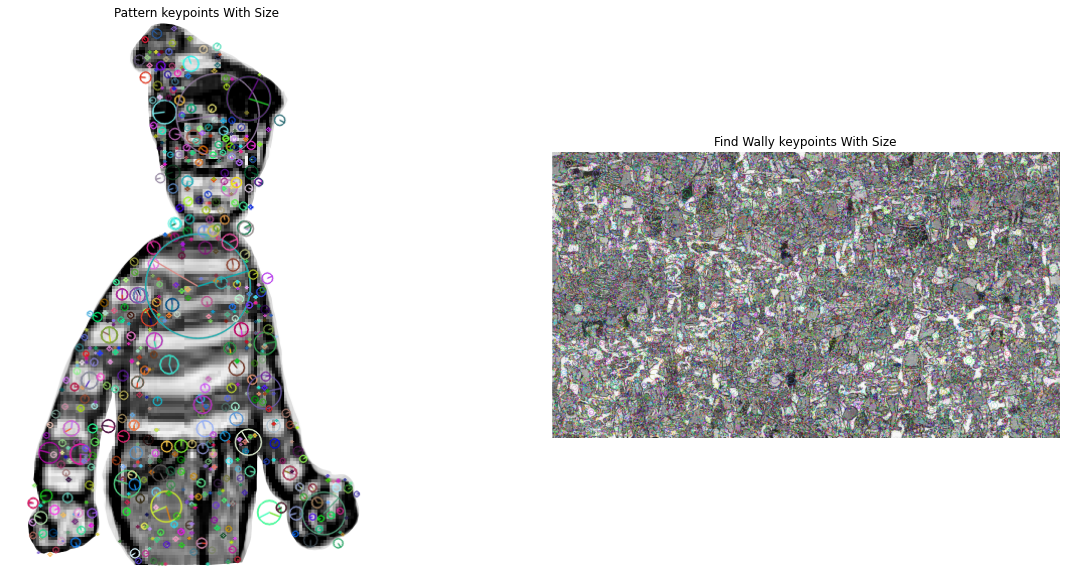

Number of Keypoints Detected In Wally's Image:  706


In [7]:
# Wally's face
img_wallys_face_rgb = cv2.cvtColor(img_wallys_face, cv2.COLOR_BGR2RGB)
keypoints_with_size = np.copy(img_wallys_face_rgb)

cv2.drawKeypoints(
    img_wallys_face_gray,
    kp_wally_face,
    keypoints_with_size,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)

# Find Wally board
img_find_wally_rgb = cv2.cvtColor(img_find_wally, cv2.COLOR_BGR2RGB)
keypoints_with_size_find_wally = np.copy(img_find_wally_rgb)

cv2.drawKeypoints(
    img_find_wally_gray,
    kp_find_wally,
    keypoints_with_size_find_wally,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)

# Print
fx, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_title("Pattern keypoints With Size")
ax[0].imshow(keypoints_with_size, cmap="gray")
ax[0].axis("off")

ax[1].set_title("Find Wally keypoints With Size")
ax[1].imshow(keypoints_with_size_find_wally, cmap="gray")
ax[1].axis("off")
plt.show()

# Print the number of keypoints detected in the wally image
print("Number of Keypoints Detected In Wally's Image: ", len(kp_wally_face))

## Match the descriptors between the 2 images - find correspondence

In [12]:
# --- YOUR CODE HERE, TO PREPARE MATCH THE DESCRIPTORS BETWEEN THE 2 IMAGES ---
# create a Brute Force Matcher object
bf = cv2.BFMatcher()


# Match descriptors.
matches = bf.match(des_wally_face, des_find_wally)
ratio_threshold = 0.75

# Sort them in the order of their distance.
matches_knn = bf.knnMatch(des_wally_face, des_find_wally, k=2)
# Apply ratio test
good = []
for m, n in matches_knn:
    if m.distance < ratio_threshold * n.distance:
        good.append([m])

result_knn = cv2.drawMatchesKnn(
    img_wallys_face_rgb,
    kp_wally_face,
    img_find_wally_rgb,
    kp_find_wally,
    good,
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
)

Print the matches

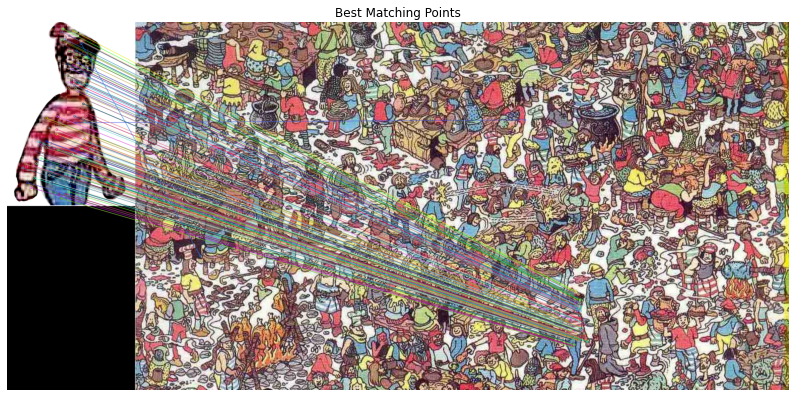


Number of Matching Keypoints Between The Training and Query Images:  706


In [13]:
result = cv2.drawMatches(
    img_wallys_face_rgb,
    kp_wally_face,
    img_find_wally_rgb,
    kp_find_wally,
    matches,
    img_find_wally_gray,
    flags=2,
)


# Display the best matching points
plt.rcParams["figure.figsize"] = [14.0, 7.0]
plt.title("Best Matching Points")
plt.imshow(result_knn)
plt.axis("off")
plt.show()

# Print total number of matching points between Wally and the puzzle board
print(
    "\nNumber of Matching Keypoints Between The Training and Query Images: ",
    len(matches),
)

We can see that a lot of matches are incorrect. So we need a way to remove the outliers.

## Remove the incorrect matches / outliers

In [ ]:
# --- YOUR CODE HERE, REMOVE THE INCORRECT MATCHES / OUTLIERS ---
# Apply ratio test


See the result:

In [ ]:
img_wally_found = cv2.drawMatches(
    img_wallys_face_rgb,
    inlier_keypoints_left,
    img_find_wally_rgb,
    inlier_keypoints_right,
    placeholder_matches,
    None,
)

# Display the best matching points
plt.rcParams["figure.figsize"] = [14.0, 7.0]
plt.title("After RANSAC")
plt.imshow(img_wally_found)
plt.axis("off")
plt.show()